### rental-prices-selangor-kl data wrangling

### Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import copy

### Data Loading

In [2]:
path = "../data/Rental_Price_cleaned.csv"
# pd.options.display.float_format = '{:.0f}'.format

In [3]:
data = pd.read_csv(path)

C:\Users\danie\AppData\Local\Temp\ipykernel_27812\822284616.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19915 entries, 0 to 19914
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19915 non-null  int64  
 1   ads_id                 19915 non-null  int64  
 2   prop_name              18977 non-null  object 
 3   completion_year        10772 non-null  float64
 4   monthly_rent           19915 non-null  float64
 5   location               19915 non-null  object 
 6   property_type          19915 non-null  object 
 7   rooms                  19915 non-null  object 
 8   parking                19915 non-null  float64
 9   bathroom               19915 non-null  float64
 10  size                   19915 non-null  int64  
 11  furnished              19915 non-null  object 
 12  facilities             19915 non-null  object 
 13  additional_facilities  19915 non-null  object 
 14  region                 19915 non-null  object 
 15  AC

In [5]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
data.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,...,Minimart,MP_Hall,No_Fac,Parking,Playground,Sauna,Security,Squash,Pool,Tennis
0,100323185,The Hipster @ Taman Desa,2022.0,4200.0,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,...,True,True,False,True,True,False,True,False,True,False
1,100203973,Segar Courts,NaN,2300.0,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,...,False,False,False,True,True,True,True,False,True,False
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Kuala Lumpur - Taman Desa,Apartment,3,0.0,2.0,650,...,True,False,False,False,False,False,False,False,True,False
3,100191767,Sentul Point Suite Apartment,2020.0,1700.0,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,...,True,False,False,True,True,False,True,True,True,False
4,97022692,Arte Mont Kiara,NaN,1299.0,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,...,True,True,False,True,True,False,True,False,True,False


We first analyse the numerical columns against the monthly rent.

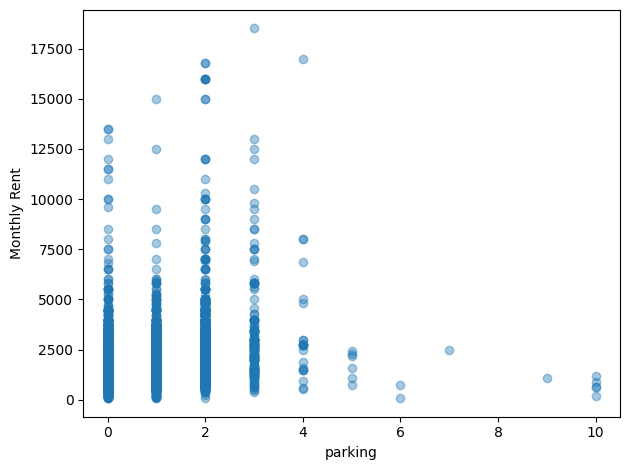

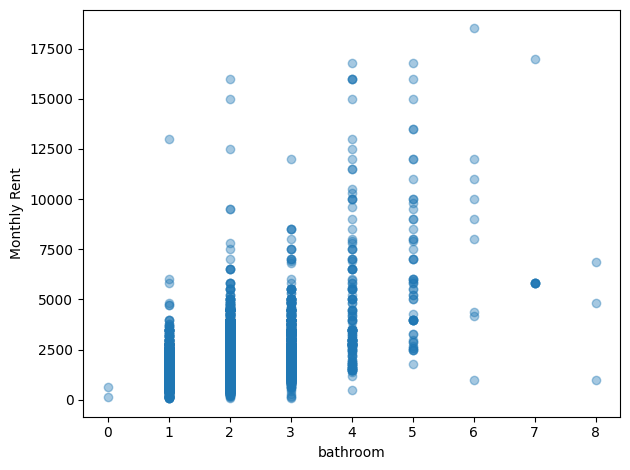

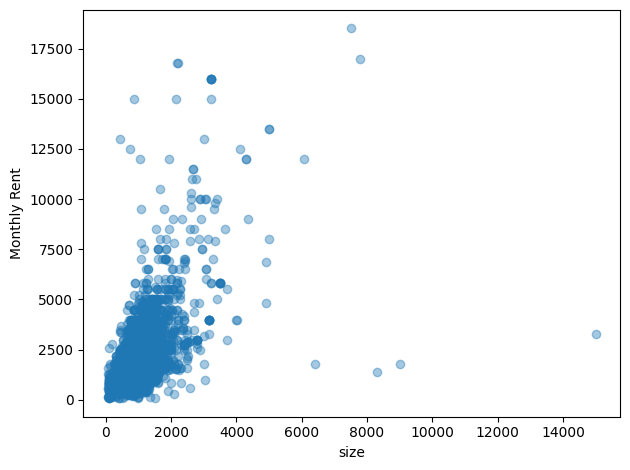

In [10]:
numeric = data.select_dtypes('number').columns.tolist()  
for col in numeric:
    if col != 'monthly_rent' and col != 'completion_year' and col != 'ads_id':
        plt.scatter(data[col], data['monthly_rent'], alpha=0.4,)
        plt.xlabel(f'{col}')
        plt.ylabel(f'Monthly Rent')
        plt.tight_layout()
        plt.show()

We'd like to better observe the `monthly_rent` against `size` since it's quite congested towards the lower half of the data. 

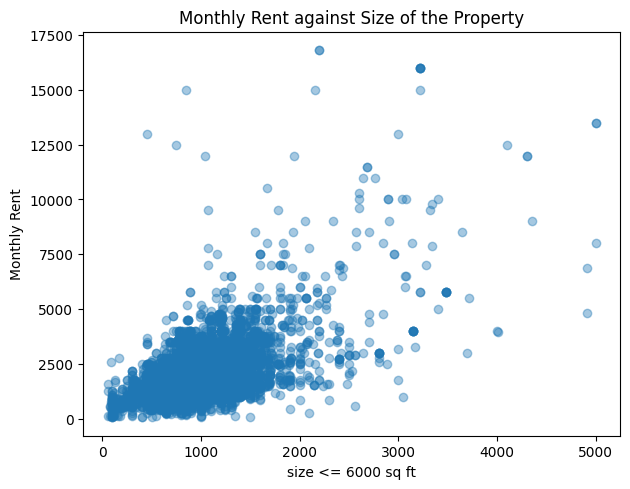

In [14]:
plt.scatter(data[data['size']<=6000]['size'], data[data['size']<=6000]['monthly_rent'], alpha=0.4,)
plt.xlabel('size <= 6000 sq ft')
plt.ylabel('Monthly Rent')
plt.tight_layout()
plt.title('Monthly Rent against Size of the Property')
plt.show()

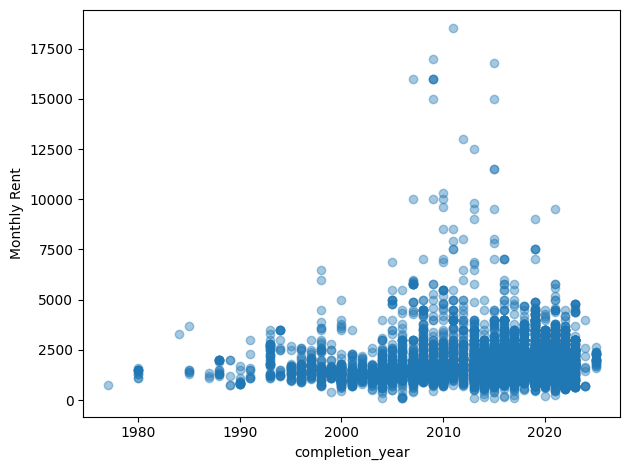

In [15]:
plt.scatter(data['completion_year'], data['monthly_rent'], alpha=0.4,)
plt.xlabel("completion_year")
plt.ylabel(f'Monthly Rent')
plt.tight_layout()
plt.show()

### Boolean Attributes

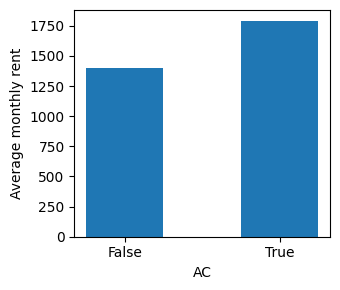

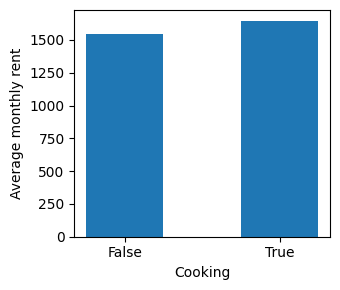

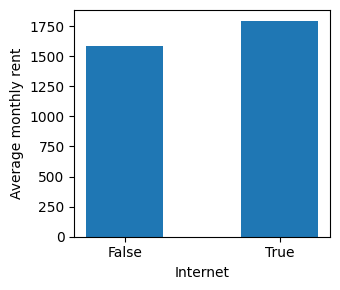

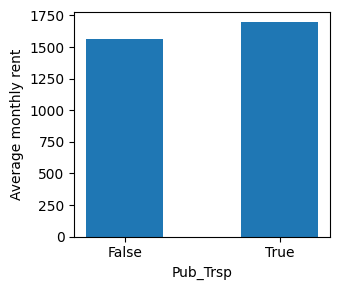

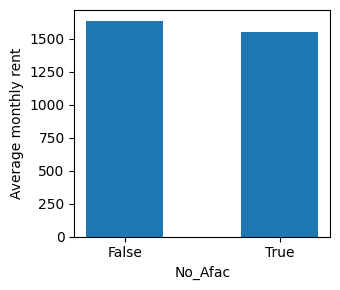

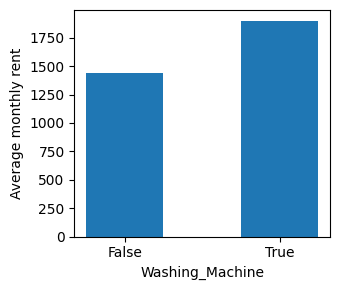

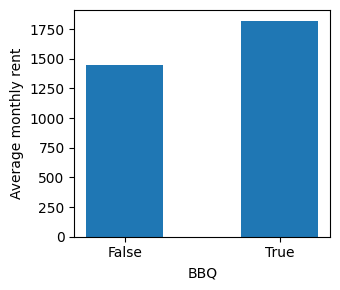

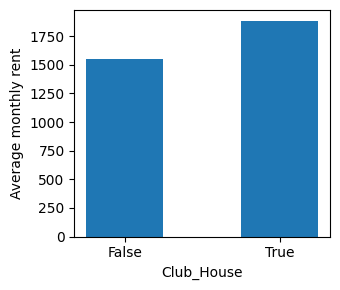

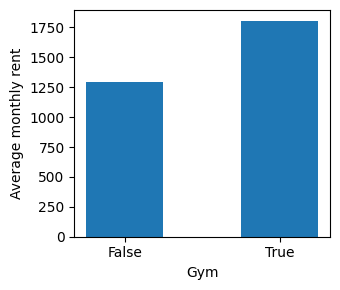

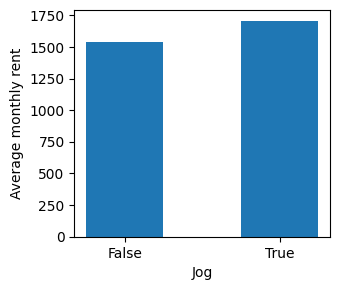

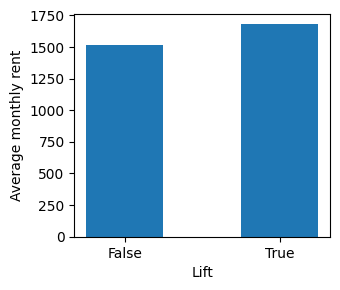

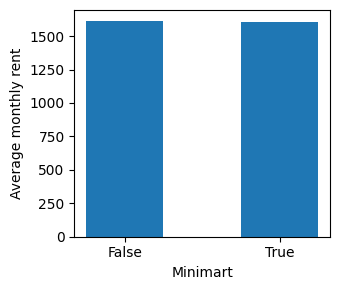

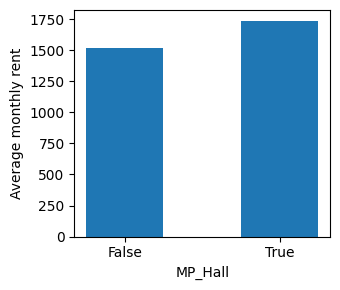

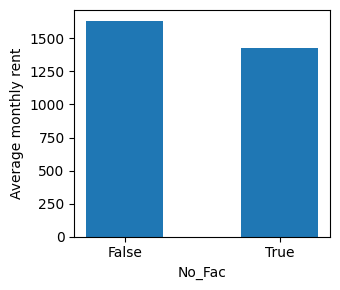

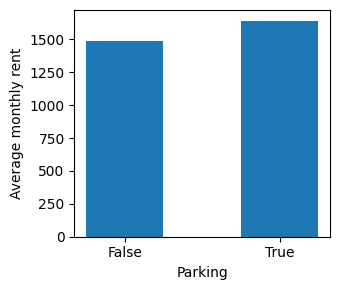

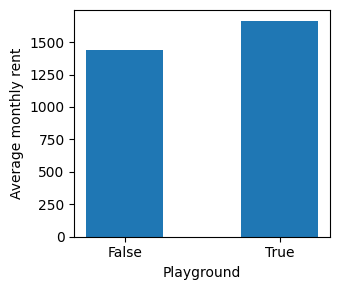

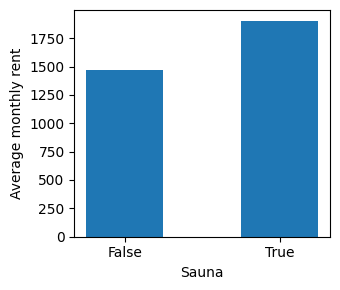

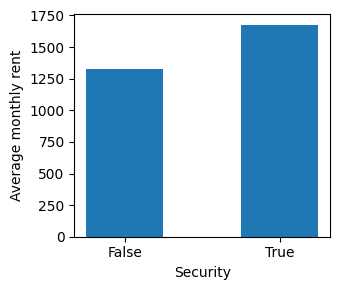

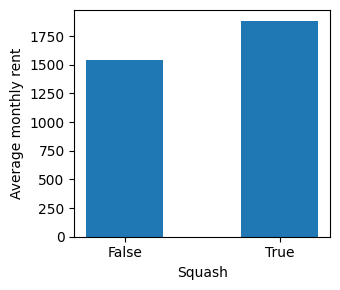

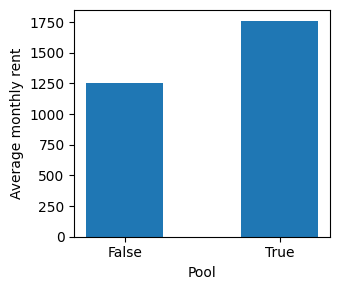

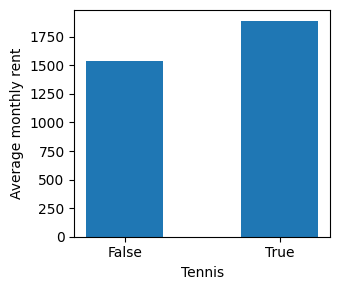

In [20]:
binary = data.select_dtypes(bool).columns.to_list()
for col in binary:
    group = data[[col, 'monthly_rent']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('monthly_rent', ascending=False)
    fig = plt.figure(figsize=(3.5,3))
    plt.bar(group[col], height=group['monthly_rent'], width=0.5)
    plt.xticks(ticks=group[col].to_list(),
               labels=group[col].to_list())
    plt.ylabel('Average monthly rent')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()

### Correlation of Attributes to Monthly Rent

In order to observe the correlation of the factors to the monthly rent, categorical attributes will first have to be converted to a usable format.

In [100]:
data_codes = copy.deepcopy(data)

In [101]:
categorical_cols = ['completion_year', 'location', 'property_type', 'rooms', 'furnished', 'region']
for cols in categorical_cols:
    data_codes[cols] = data_codes[cols].astype('category').cat.codes

All boolean columns will also be converted to categorical.

In [102]:
binary = data.select_dtypes(bool).columns.to_list()
for cols in binary:
    data_codes[cols] = data_codes[cols].astype('category').cat.codes

Let's look at the correlation of the property factors with the monthly rent, starting with basic factors excluding facilities. 

In [108]:
#since ads_id are a unique identifier for each property, they won't have a correlation
#to the monthly_rent. Therefore we decided exclude it
factors = data_codes.iloc[:,1:14].drop(columns=['facilities', 'additional_facilities'])
factors_corr = factors.corr()

C:\Users\danie\AppData\Local\Temp\ipykernel_27812\2524081459.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_corr = factors.corr()


([<matplotlib.axis.YTick at 0x1fd23f1ea50>,
 [Text(0, 0.5, 'completion_year'),
  Text(0, 1.5, 'monthly_rent'),
  Text(0, 2.5, 'location'),
  Text(0, 3.5, 'property_type'),
  Text(0, 4.5, 'rooms'),
  Text(0, 5.5, 'parking'),
  Text(0, 6.5, 'bathroom'),
  Text(0, 7.5, 'size'),
  Text(0, 8.5, 'furnished'),
  Text(0, 9.5, 'region')])

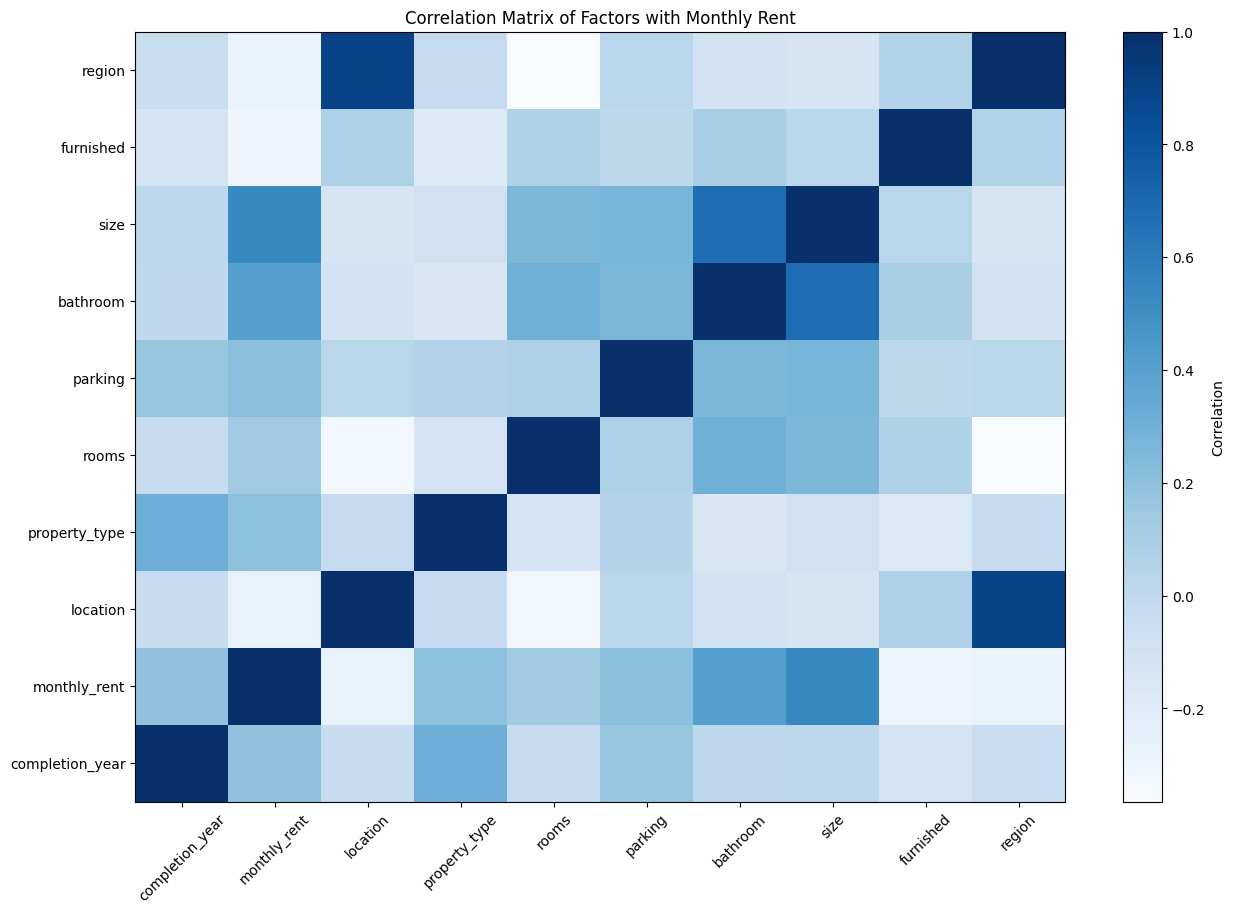

In [116]:
fig, ax = plt.subplots(figsize=(15,10))
plt.pcolor(factors_corr, cmap=plt.cm.Blues)
plt.colorbar(label="Correlation", orientation="vertical")
plt.title('Correlation Matrix of Factors with Monthly Rent')

plt.xticks(np.arange(10)+0.5,factors_corr.index.to_list(), rotation=45)
plt.yticks(np.arange(10)+0.5,factors_corr.index.to_list())

In [ ]:
X_axis = np.arrange()